In [319]:
##copied from a note i left in the back stars section
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

In [320]:
#BOTTOM
ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv') 
#print(bottomstars.keys())

In [321]:
ddir_stars = '/Users/eleanor/Downloads/universe_2/'
variables = ddir_stars + '/Variable_Star_Data/'
print(variables)

/Users/eleanor/Downloads/universe_2//Variable_Star_Data/


Text(0.5, 1.0, 'Bottom')

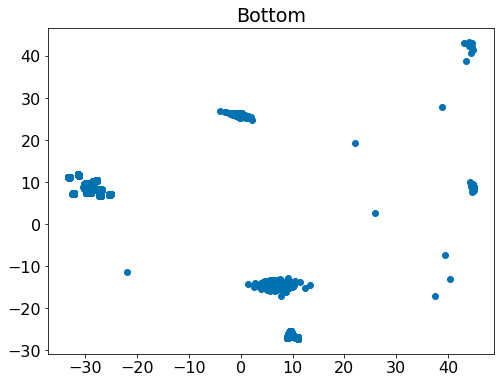

In [322]:
XB=bottomstars.X
YB=bottomstars.Y

CB=np.array(list(zip(bottomstars.X,bottomstars.Y)))
plt.scatter(CB[:,0], CB[:,1])
plt.title('Bottom')

In [323]:
from sklearn.cluster import KMeans
import math

In [324]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CB)

KMeans(n_clusters=12)

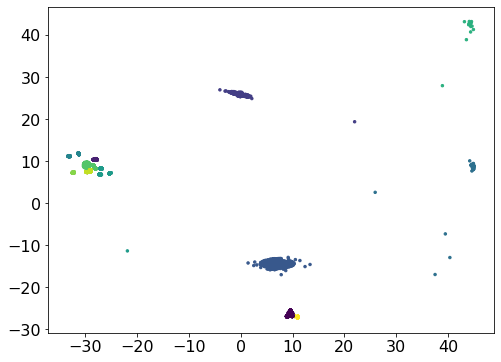

In [325]:
plt.scatter(CB[:,0], CB[:,1],s=6, c=kmeans.labels_)

In [326]:
xb = kmeans.cluster_centers_ # This

In [327]:
kmeans.labels_

array([8, 8, 8, ..., 4, 2, 4], dtype=int32)

In [328]:
xb

array([[  9.58038264, -26.36522858],
       [-28.04827114,  10.35658308],
       [ -0.15756652,  25.85765781],
       [  6.94965162, -14.34628868],
       [ 44.06981429,   7.247     ],
       [-32.22428114,  11.44455232],
       [-26.36139981,   7.34040429],
       [ 43.79152308,  40.96985385],
       [-29.02924347,   8.82566678],
       [-32.27437828,   7.28564368],
       [-29.26305208,   7.56068464],
       [ 10.76941671, -26.96794712]])

In [329]:
#Top
ddir = '/Users/eleanor/Downloads/universe_2/'
topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 

Text(0.5, 1.0, 'Top')

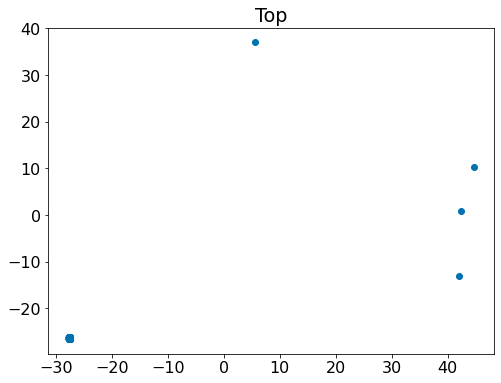

In [330]:
XT=topstars.X
YT=topstars.Y

CT=np.array(list(zip(topstars.X,topstars.Y)))
plt.scatter(CT[:,0], CT[:,1]) #centre of this one is (-27.7,-26.5)
centre=(-27.7,-26.5)
plt.title("Top")

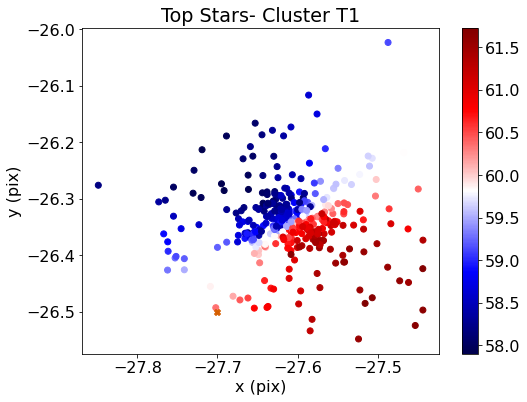

In [331]:
d = np.sqrt((topstars.X-centre[0])** 2 + (topstars.Y - centre[1])**2)
galaxyt1 = topstars[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster T1');

19952.62314968879

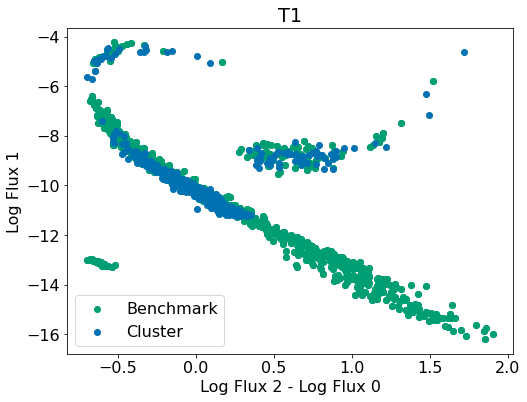

In [622]:
m0, m1, m2 = (np.log10(galaxyt1['BlueF']), 
              np.log10(galaxyt1['GreenF']), 
              np.log10(galaxyt1['RedF'])) 
colour = m2-m0

#st1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])


plt.title('T1')
10**(8.6/2)

In [333]:
#vargalaxy = galaxyt1[galaxyt1['Variable?']==1] THIS searches through a defined galaxy and pulls all variable stars
#print(vargalaxy) prints all variables in galaxy
# galaxyt1.iloc[[24]] #select one star and print its information

In [334]:
#Right
ddir = '/Users/eleanor/Downloads/universe_2/'
rightstars = pd.read_csv(ddir+'Right/Star_Data.csv') 

Text(0.5, 1.0, 'Right')

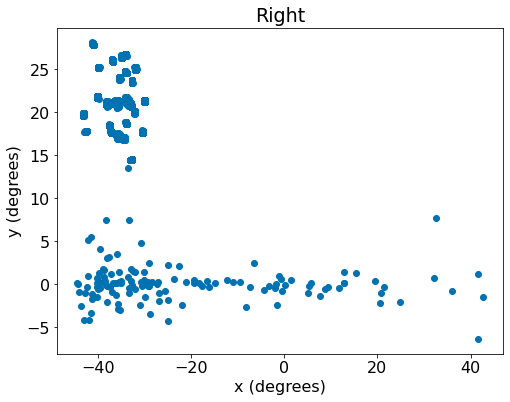

In [335]:
XR=rightstars.X
YR=rightstars.Y

CR=np.array(list(zip(rightstars.X,rightstars.Y)))
plt.scatter(CR[:,0], CR[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Right')

array([[-34.24686436,  17.87969781],
       [-34.43785384,  26.58364298],
       [-43.07699318,  19.72556013],
       [  2.00157692,  -0.13252308],
       [-40.02721245,  21.75726285],
       [-36.67475787,  21.0755905 ],
       [-25.09570857,  -0.1177    ],
       [-33.00350538,  20.80898244],
       [-41.07492727,  27.9616048 ],
       [-34.4441052 ,  24.45057324],
       [-36.85706167,  17.83036276],
       [-32.81452812,  14.43943056],
       [-39.82382889,  25.18891709],
       [-30.46265895,  17.70673729],
       [-29.93993916,  21.30469491],
       [ 30.34870909,  -0.42380909],
       [-38.12126207,   0.21407931],
       [-42.56652526,  17.75448185],
       [-32.16457647,  24.54065275],
       [-36.89233287,  26.06034188]])

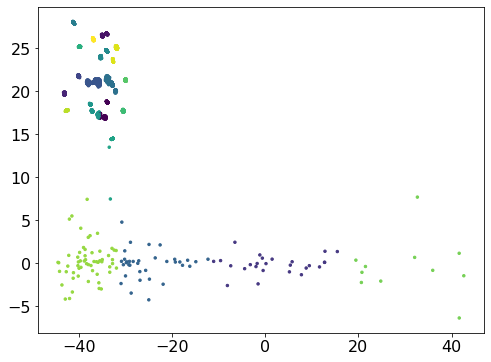

In [336]:
kmeans=KMeans(n_clusters=20)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
xr = kmeans.cluster_centers_
xr

array([[-36.67475787,  21.0755905 ],
       [ -4.88444118,  -0.11680588],
       [-34.4441052 ,  24.45057324],
       [-30.46265895,  17.70673729],
       [-42.77839204,  18.57256655],
       [-39.82382889,  25.18891709],
       [-26.14553714,  -0.10993143],
       [ 37.76946667,   0.13363333],
       [-32.81452812,  14.43943056],
       [-33.00350538,  20.80898244],
       [-37.30176023,  18.05313744],
       [-29.93993916,  21.30469491],
       [-38.34194107,   0.20580357],
       [-41.07492727,  27.9616048 ],
       [-40.02721245,  21.75726285],
       [-34.64141524,  17.70572898],
       [-36.89233287,  26.06034188],
       [-32.16457647,  24.54065275],
       [-34.43785384,  26.58364298],
       [ 13.4471875 ,  -0.39399375]])

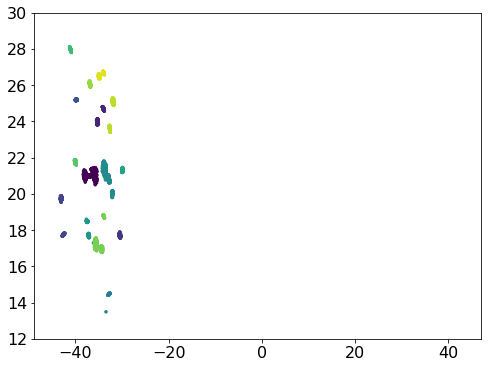

In [337]:
#stars on bottom look like individual, get rid of them to cluster
kmeans=KMeans(n_clusters=20)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
plt.ylim((12,30))
xr = kmeans.cluster_centers_
xr

Text(0.5, 1.0, 'Left')

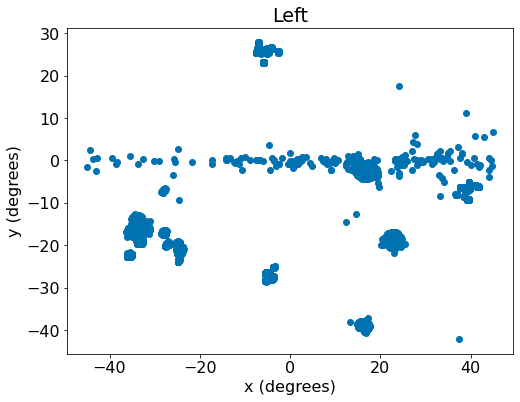

In [338]:
#Left
ddir = '/Users/eleanor/Downloads/universe_2/'
leftstars = pd.read_csv(ddir+'Left/Star_Data.csv') 
XL=rightstars.X
YL=rightstars.Y

CL=np.array(list(zip(leftstars.X,leftstars.Y)))
plt.scatter(CL[:,0], CL[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Left')

array([[ 40.47330496,  -5.93967109],
       [-24.61571099, -21.18091404],
       [ -6.07136525,  25.81389625],
       [ -4.66247907, -26.93237377],
       [ 22.69950279, -18.69796356],
       [-33.98280337, -15.31157743],
       [ 16.25629932,  -2.28105293],
       [ 16.27581863, -38.88327001],
       [ 38.4353759 ,  -7.35728114],
       [-27.72052661,  -6.74524347],
       [-34.34546027, -20.61324501],
       [-27.61514928, -18.21681123]])

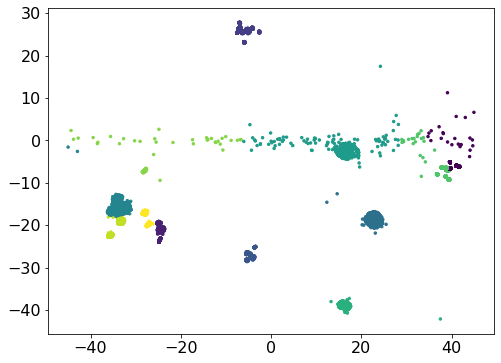

In [339]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CL)
plt.scatter(CL[:,0], CL[:,1],s=6, c=kmeans.labels_)
xl = kmeans.cluster_centers_
xl

Text(0.5, 1.0, 'Front')

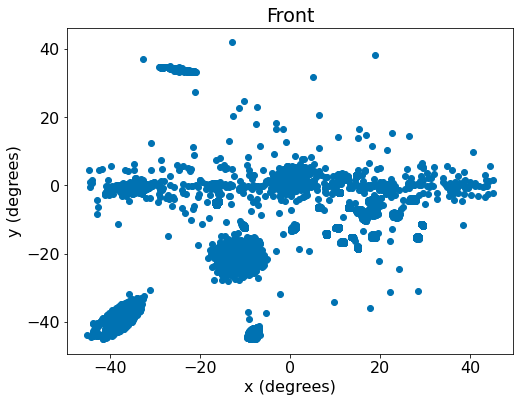

In [340]:
#Front
ddir = '/Users/eleanor/Downloads/universe_2/'
frontstars = pd.read_csv(ddir+'Front/Star_Data.csv') 
XF=frontstars.X
YF=frontstars.Y

CF=np.array(list(zip(frontstars.X,frontstars.Y)))
plt.scatter(CF[:,0], CF[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Front')

array([[ 12.42356871,   1.3077539 ],
       [-10.94783942, -17.60958602],
       [-24.79013849,  33.86755615],
       [ 19.21017494,  -5.55865182],
       [-37.88745448, -38.98062688],
       [-35.12068182,  -0.68912874],
       [  7.09091458, -11.45788549],
       [ -8.17822995, -43.41380792],
       [-16.32145952,  -4.98072543],
       [  0.07503851,   2.08690821],
       [ 29.21850749, -12.64624969],
       [ 14.83070379, -16.41895806]])

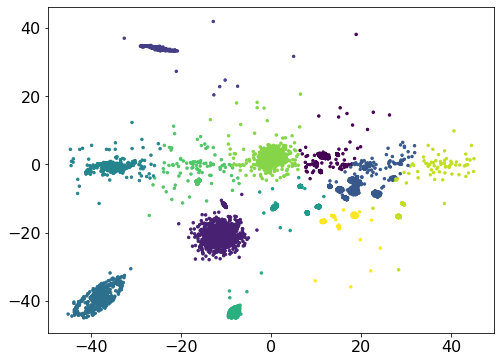

In [341]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CF)
plt.scatter(CF[:,0], CF[:,1],s=6, c=kmeans.labels_)
xf = kmeans.cluster_centers_
xf

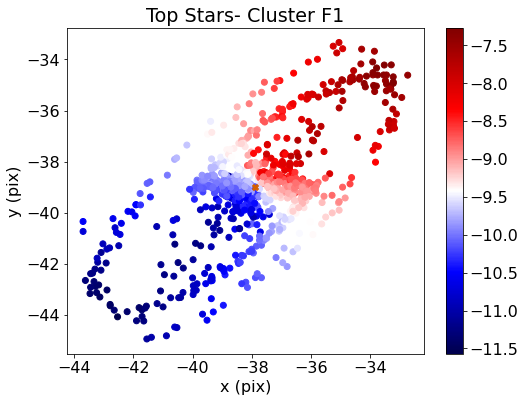

In [342]:
centre = (-37.88745448, -38.98062688)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf1 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf1.X,galaxyf1.Y,c=galaxyf1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F1');

Text(0.5, 1.0, 'F1')

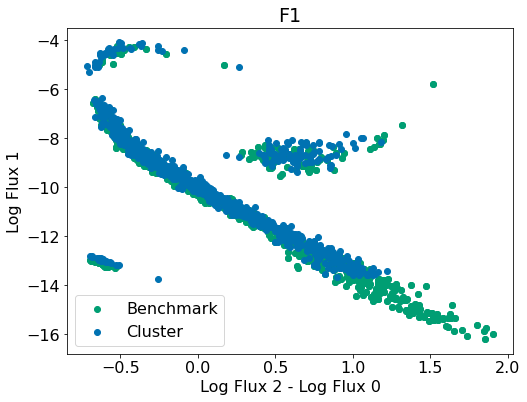

In [343]:
m0, m1, m2 = (np.log10(galaxyf1['BlueF']), 
              np.log10(galaxyf1['GreenF']), 
              np.log10(galaxyf1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6/2)
plt.title('F1')

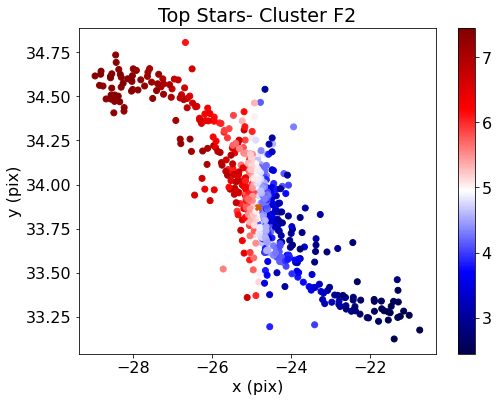

In [344]:
centre = (-24.83723476,  33.87115245)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf2 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf2.X,galaxyf2.Y,c=galaxyf2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F2');

Text(0.5, 1.0, 'F2')

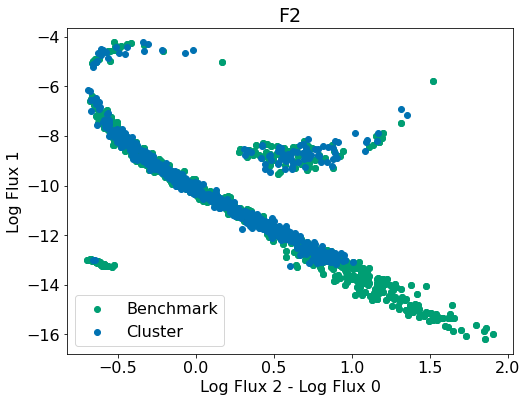

In [345]:
m0, m1, m2 = (np.log10(galaxyf2['BlueF']), 
              np.log10(galaxyf2['GreenF']), 
              np.log10(galaxyf2['RedF'])) 
colour = m2-m0

#sf2 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6.5/2)
plt.title("F2")

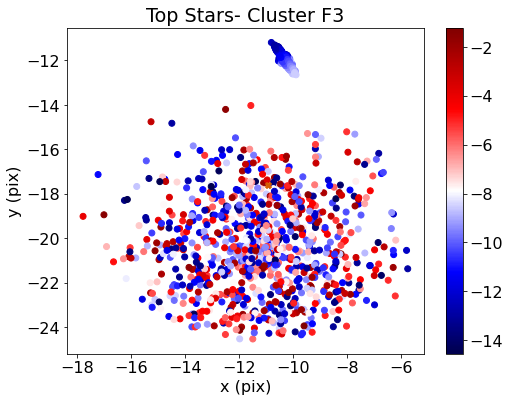

In [346]:
centre = (-10.94783942, -17.60958602)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf3 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf3.X,galaxyf3.Y,c=galaxyf3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F3');

3162.2776601683795

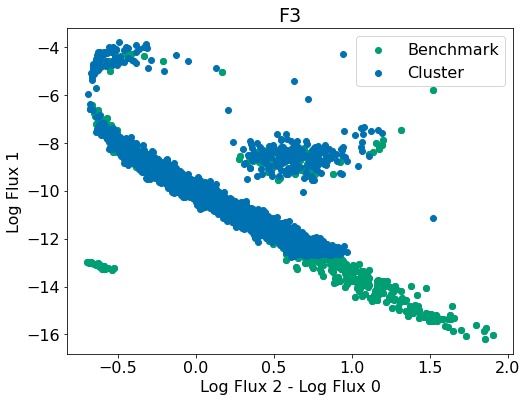

In [347]:
m0, m1, m2 = (np.log10(galaxyf3['BlueF']), 
              np.log10(galaxyf3['GreenF']), 
              np.log10(galaxyf3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title("F3")
10**(7/2)

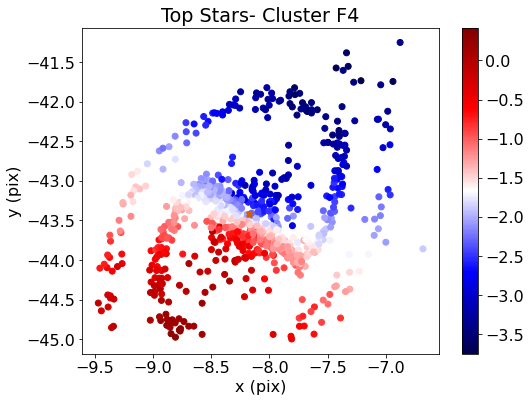

In [348]:
centre = (-8.17822995, -43.41380792)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf4 = frontstars[d<4] # filter to only close ones
plt.scatter(galaxyf4.X,galaxyf4.Y,c=galaxyf4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F4');

3162.2776601683795

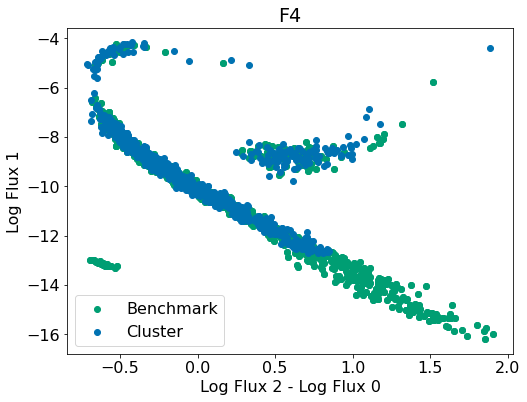

In [349]:
m0, m1, m2 = (np.log10(galaxyf4['BlueF']), 
              np.log10(galaxyf4['GreenF']), 
              np.log10(galaxyf4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F4')
10**(7/2)

Name       X       Y         BlueF        GreenF          RedF  \
21606  FrontS167359  0.2113  2.1105  1.408000e-15  3.514000e-15  1.743000e-14   
21607  FrontS167360  0.0303  2.2054  2.935000e-16  2.644000e-16  1.503000e-16   
21608  FrontS167361  0.3502  2.1316  1.257000e-17  1.509000e-17  1.627000e-17   
21609  FrontS167362  0.3639  2.2178  1.203000e-15  1.001000e-15  4.829000e-16   
21610  FrontS167365  0.4491  2.5160  2.205000e-18  3.077000e-18  4.203000e-18   
...             ...     ...     ...           ...           ...           ...   
23004  FrontS169464 -3.8571 -0.0626  3.639000e-14  3.986000e-14  3.498000e-14   
23005  FrontS169465 -4.3058 -0.8335  1.000000e-08  7.578000e-09  3.050000e-09   
23006  FrontS169467 -5.3762  1.2290  4.239000e-13  3.746000e-13  2.137000e-13   
23007  FrontS169468 -6.3210 -0.1380  3.024000e-15  3.760000e-15  4.255000e-15   
23032  FrontS169552 -3.3415 -0.1524  4.409000e-14  4.417000e-14  3.238000e-14   

       Parallax  RadialVelocity  Variable?  
21606     0.000            2.63          1  
21607     0.000            4.00          0  
21608     0.001            4.20          0  
21609     0.001            4.58          0  
21610     0.001            4.75          0  
...         ...             ...        ...  
23004     0.015           -0.27          0  
23005     0.014           -0.29          0  
23006     0.015           -0.37          0  
23007     0.014           -0.42          0  
23032     0.011           -0.21          0  

[1000 rows x 9 columns]

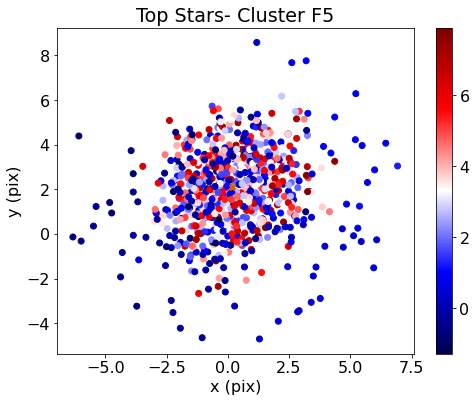

In [350]:
centre = (0.16062933,   2.11029051)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf5 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf5.X,galaxyf5.Y,c=galaxyf5.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F5');
galaxyf5

1778.2794100389228

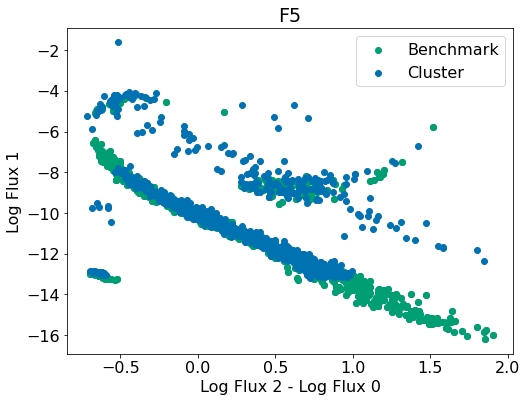

In [351]:
m0, m1, m2 = (np.log10(galaxyf5['BlueF']), 
              np.log10(galaxyf5['GreenF']), 
              np.log10(galaxyf5['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F5')
10**(6.5/2)

Text(0.5, 1.0, 'Back')

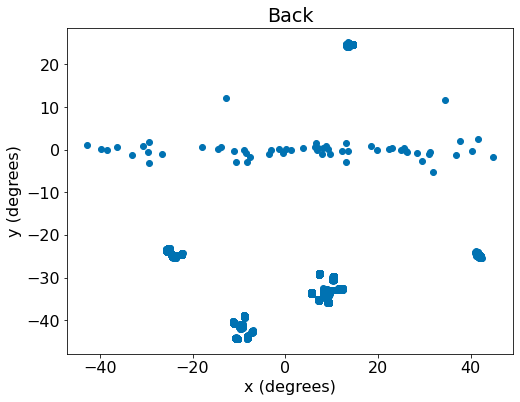

In [352]:
#Back
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
ddir = '/Users/eleanor/Downloads/universe_2/'
backstars = pd.read_csv(ddir+'Back/Star_Data.csv') 
#XBA=backstars.X[backstars.Y<-10&backstars.Y>19]
XBA=backstars.X
YBA=backstars.Y

CBA=np.array(list(zip(backstars.X,backstars.Y)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back')

(13645,) (13645,)


Text(0.5, 1.0, 'Back-Reduced')

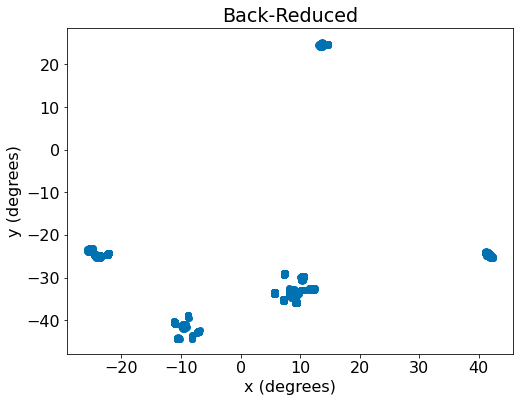

In [353]:
XBA=backstars.X[(backstars.Y<-10)|(backstars.Y>19)]
YBA=backstars.Y[(backstars.Y<-10)|(backstars.Y>19)]
# XBA=backstars.X[(backstars.Y>19)]
# YBA=backstars.Y[(backstars.Y>19)]
print(np.shape(YBA), np.shape(XBA))
CBA=np.array(list(zip(XBA,YBA)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back-Reduced')

array([[ 10.42071839, -29.80672286],
       [ 14.52497384,  24.71534616],
       [-22.32923073, -24.51114134],
       [ -9.51475882, -41.44602602],
       [ 41.65401492, -24.66319513],
       [  7.23939239, -35.28150299],
       [ 10.37419578, -32.92942329],
       [ -7.08522101, -42.68815294],
       [-24.42321423, -24.76371036],
       [-10.51791533, -44.26506245],
       [  7.38684234, -29.09425255],
       [  5.71196328, -33.68406677],
       [ -8.79838502, -39.13926435],
       [ 12.25934408, -32.65742111],
       [  8.76339623, -33.63173543],
       [  9.26548462, -35.81633573],
       [-11.13208013, -40.58794292],
       [ -8.14270442, -43.96367691],
       [ 13.56565183,  24.58746981],
       [-25.29921244, -23.51684139],
       [ 10.28218743, -30.58019354],
       [-23.7411227 , -25.02280837],
       [ 11.69323639, -32.71761962]])

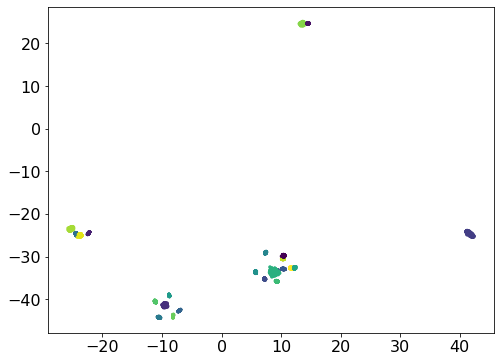

In [354]:
kmeans=KMeans(n_clusters=23)
kmeans.fit(CBA)
plt.scatter(CBA[:,0], CBA[:,1],s=6, c=kmeans.labels_)
xba = kmeans.cluster_centers_
xba

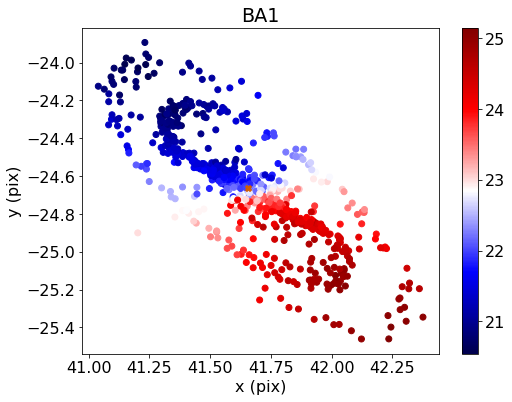

In [361]:
centre = (41.65401492, -24.66319513)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba1 = backstars[d<7] # filter to only close ones
plt.scatter(galaxyba1.X,galaxyba1.Y,c=galaxyba1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA1');


8912.509381337459

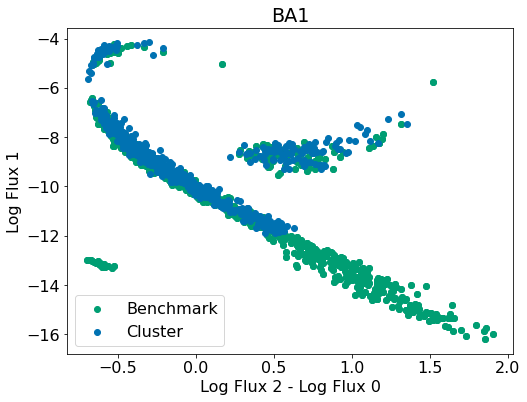

In [494]:
m0, m1, m2 = (np.log10(galaxyba1['BlueF']), 
              np.log10(galaxyba1['GreenF']), 
              np.log10(galaxyba1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA1')
10**(7.9/2)



In [635]:
#galaxyba1

In [652]:
vargalaxyba1=galaxyba1[galaxyba1['Variable?']==1]
print(np.shape(vargalaxyba1))
print(vargalaxyba1)
print(bytes('BackS141889','utf-8'))
print()

(54, 9)
              Name        X        Y         BlueF        GreenF  \
11691  BackS141889  41.7002 -24.6798  8.289000e-13  6.917000e-13   
11749  BackS142010  41.7346 -24.7190  3.412000e-17  8.825000e-17   
11825  BackS142145  41.6407 -24.5254  1.567000e-16  3.795000e-16   
11845  BackS142177  41.7519 -24.7701  2.488000e-16  6.973000e-16   
11850  BackS142186  41.5726 -24.6223  8.640000e-13  6.550000e-13   
11866  BackS142212  41.8044 -24.9403  1.365000e-16  1.052000e-16   
11895  BackS142259  41.5650 -24.6386  5.837000e-13  4.439000e-13   
11906  BackS142271  41.8149 -24.8703  5.673000e-17  1.178000e-16   
11920  BackS142288  41.5021 -24.5967  9.098000e-13  7.900000e-13   
11941  BackS142314  41.8414 -24.8306  2.032000e-16  1.578000e-16   
11948  BackS142323  41.5326 -24.5946  1.886000e-16  1.453000e-16   
11949  BackS142324  41.5977 -24.6592  3.224000e-17  7.095000e-17   
11951  BackS142327  41.8626 -24.8259  1.286000e-16  9.745000e-17   
12030  BackS142454  41.4258 -24.5150  1.

In [650]:
variables

'/Users/eleanor/Downloads/universe_2//Variable_Star_Data/'

In [639]:
m0, m1, m2 = np.log10(galaxyba1['BlueF']), np.log10(galaxyba1['GreenF']), np.log10(galaxyba1['RedF']) 
colour = m2-m0
abs_mag = m1 + 2*np.log10(1./galaxyba1.Parallax) 

v0, v1, v2 = np.log10(vargalaxyba1['BlueF']), np.log10(vargalaxyba1['GreenF']), np.log10(vargalaxyba1['RedF']) 
variable_colour = v2-v0
abs_mag_v = v1 + 2*np.log10(1./vargalaxyba1.Parallax)

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

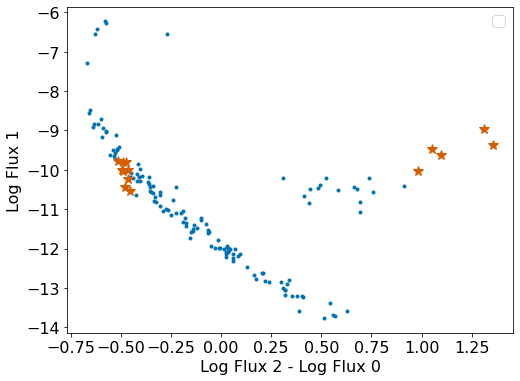

In [640]:
s = plt.plot(colour,abs_mag,'.C0')
h = plt.plot(variable_colour,abs_mag_v,'.C2',marker='*',markersize=10)

    
plt.legend([s, h],['Steady','Variable'])
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

In [642]:
plt.plot(vargalaxyba1.Period,abs_mag_v,'.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');

AttributeError: 'DataFrame' object has no attribute 'Period'

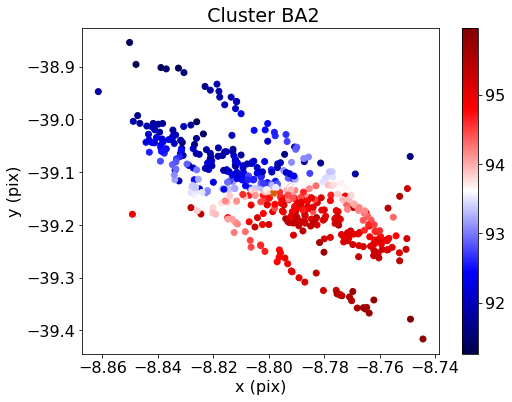

In [363]:
centre = (-8.79838502, -39.139264351)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba2 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba2.X,galaxyba2.Y,c=galaxyba2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title(' Cluster BA2');


25118.864315095823

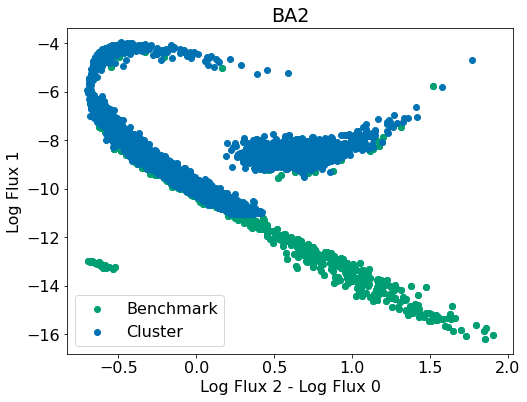

In [499]:
m0, m1, m2 = (np.log10(galaxyba2['BlueF']), 
              np.log10(galaxyba2['GreenF']), 
              np.log10(galaxyba2['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.8,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA2')
10**(8.8/2)

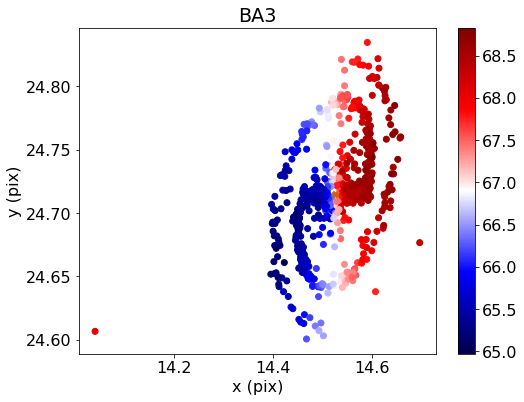

In [416]:
centre = (14.52497384,  24.71534616)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba3 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba3.X,galaxyba3.Y,c=galaxyba3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA3');


25118.864315095823

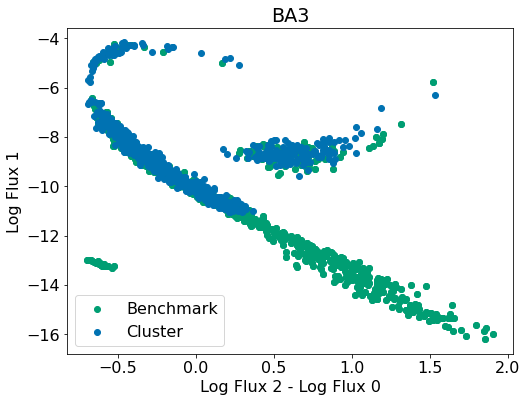

In [502]:
m0, m1, m2 = (np.log10(galaxyba3['BlueF']), 
              np.log10(galaxyba3['GreenF']), 
              np.log10(galaxyba3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.8,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA3')
10**(8.8/2)

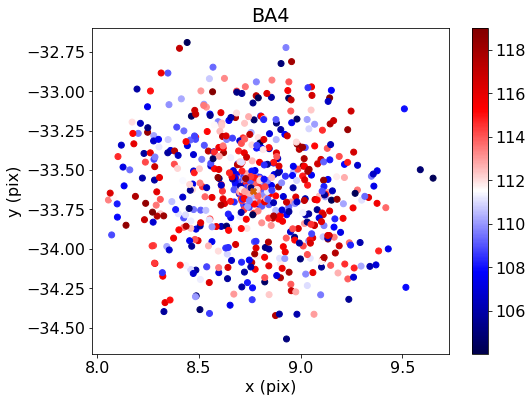

In [371]:
centre = (8.76339623, -33.63173543)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba4 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba4.X,galaxyba4.Y,c=galaxyba4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA4');


22387.21138568338

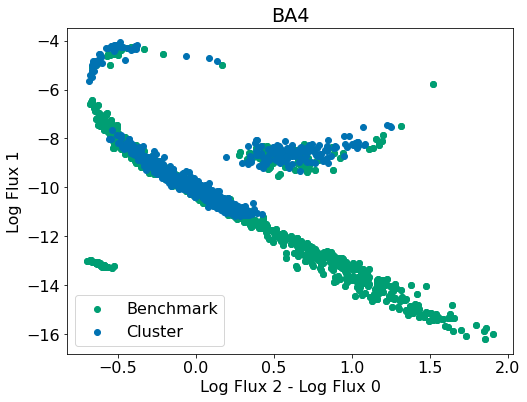

In [507]:
m0, m1, m2 = (np.log10(galaxyba4['BlueF']), 
              np.log10(galaxyba4['GreenF']), 
              np.log10(galaxyba4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA4')
10**(8.7/2)

Text(0.5, 1.0, 'BA5a')

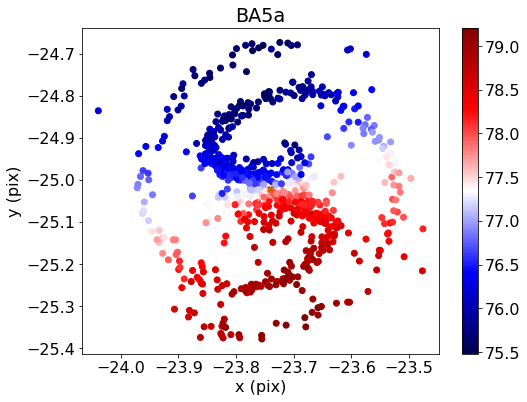

In [423]:
centre = (-23.7411227 , -25.02280837)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba5a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba5a.X,galaxyba5a.Y,c=galaxyba5a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA5a')


11220.18454301963

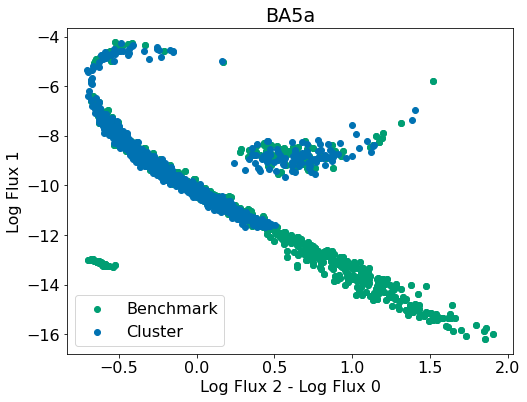

In [514]:
m0, m1, m2 = (np.log10(galaxyba5a['BlueF']), 
              np.log10(galaxyba5a['GreenF']), 
              np.log10(galaxyba5a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA5a')
10**(8.1/2)

Text(0.5, 1.0, 'BA5b')

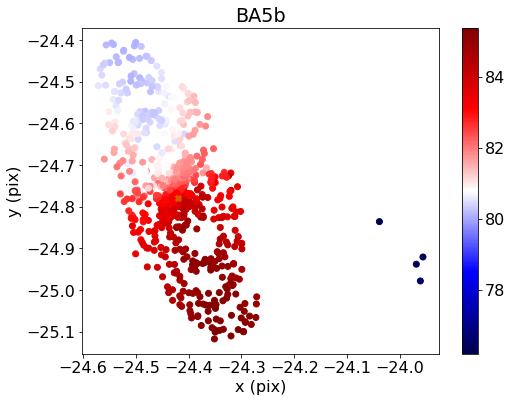

In [422]:
centre = (-24.42 , -24.78)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba5b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba5b.X,galaxyba5b.Y,c=galaxyba5b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA5b')

12589.254117941662

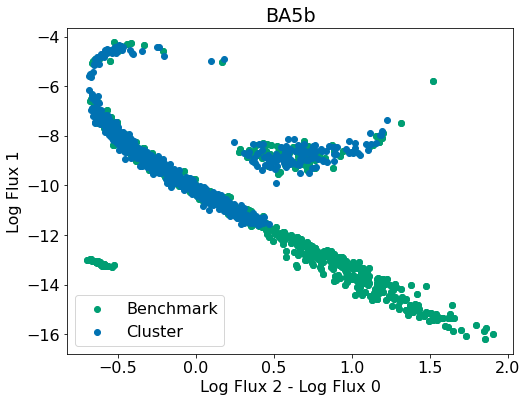

In [519]:
m0, m1, m2 = (np.log10(galaxyba5b['BlueF']), 
              np.log10(galaxyba5b['GreenF']), 
              np.log10(galaxyba5b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.2,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA5b')
10**(8.2/2)

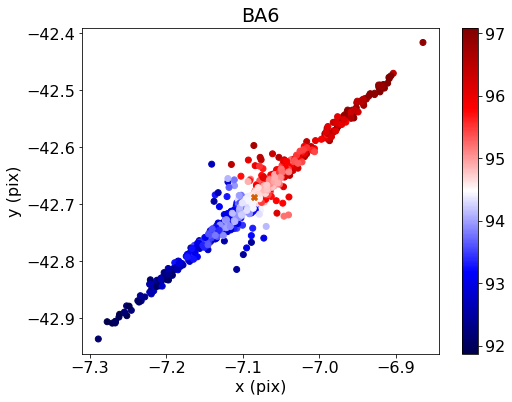

In [378]:
centre = (-7.08522101, -42.68815294)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba6 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba6.X,galaxyba6.Y,c=galaxyba6.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA6');


22387.21138568338

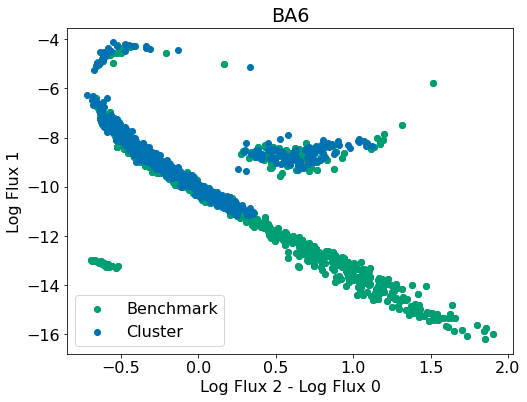

In [522]:
m0, m1, m2 = (np.log10(galaxyba6['BlueF']), 
              np.log10(galaxyba6['GreenF']), 
              np.log10(galaxyba6['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA6')
10**(8.7/2)

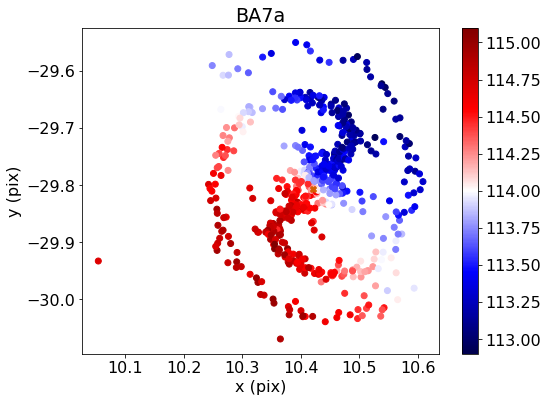

In [432]:
centre = (10.42071839, -29.80672286)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba7a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba7a.X,galaxyba7a.Y,c=galaxyba7a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA7a');


19952.62314968879

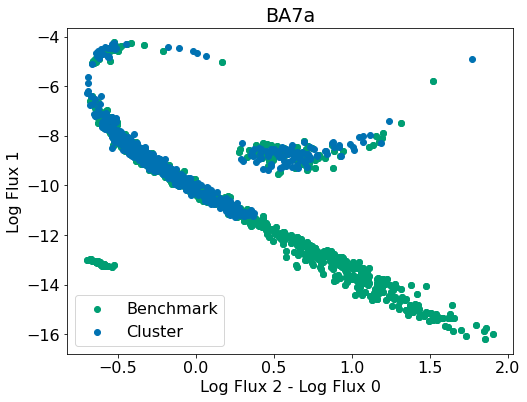

In [528]:
m0, m1, m2 = (np.log10(galaxyba7a['BlueF']), 
              np.log10(galaxyba7a['GreenF']), 
              np.log10(galaxyba7a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA7a')
10**(8.6/2)

Text(0.5, 1.0, 'BA7b')

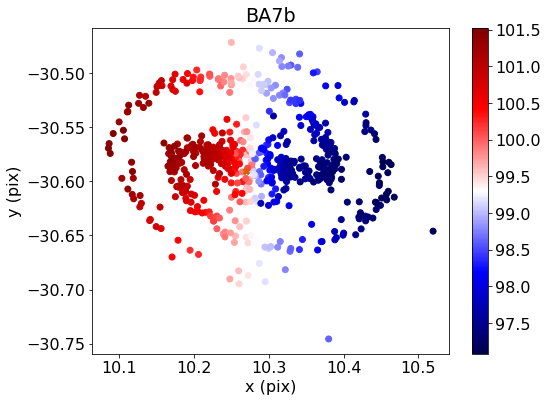

In [431]:
centre = (10.27 , -30.59)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba7b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba7b.X,galaxyba7b.Y,c=galaxyba7b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA7b')

19952.62314968879

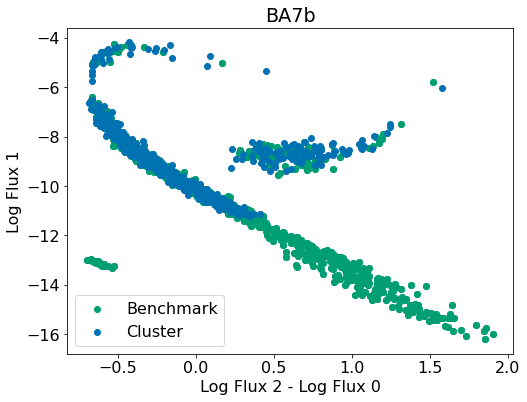

In [535]:
m0, m1, m2 = (np.log10(galaxyba7b['BlueF']), 
              np.log10(galaxyba7b['GreenF']), 
              np.log10(galaxyba7b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA7b')
10**(8.6/2)

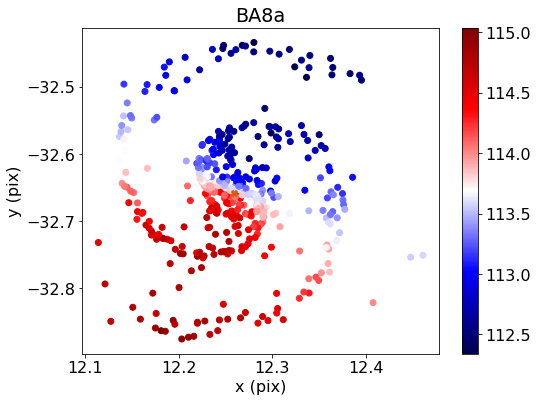

In [440]:
centre = (12.25934408, -32.65742111)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba8a = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba8a.X,galaxyba8a.Y,c=galaxyba8a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA8a');


19952.62314968879

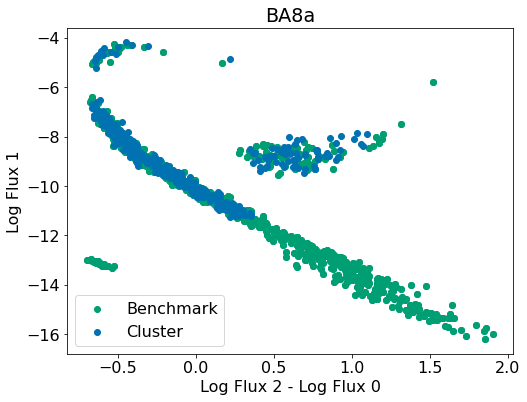

In [539]:
m0, m1, m2 = (np.log10(galaxyba8a['BlueF']), 
              np.log10(galaxyba8a['GreenF']), 
              np.log10(galaxyba8a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA8a')
10**(8.6/2)

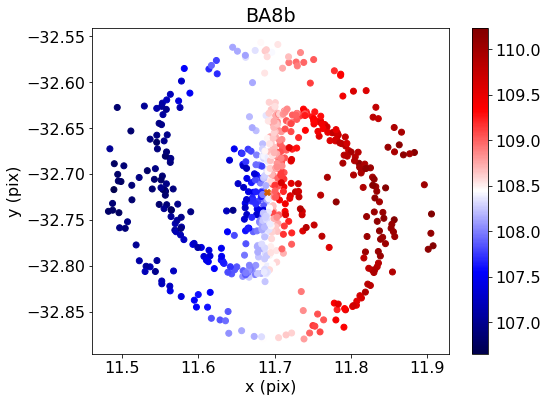

In [471]:
centre = (11.69, -32.72)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba8b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba8b.X,galaxyba8b.Y,c=galaxyba8b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA8b');

17782.794100389227

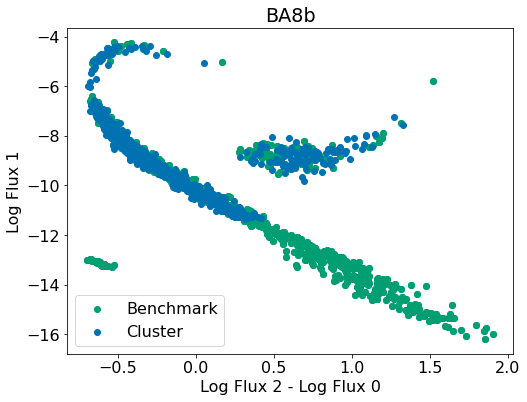

In [545]:
m0, m1, m2 = (np.log10(galaxyba8b['BlueF']), 
              np.log10(galaxyba8b['GreenF']), 
              np.log10(galaxyba8b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA8b')
10**(8.5/2)

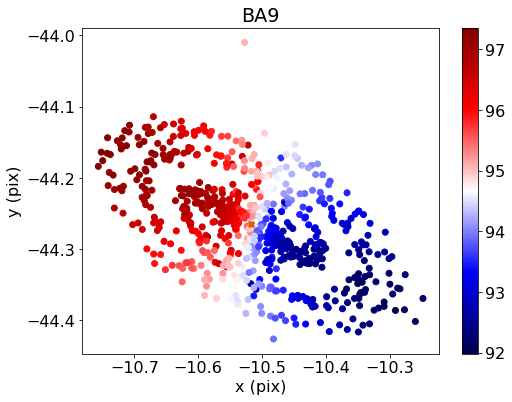

In [384]:
centre = (-10.51791533, -44.26506245)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba9 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba9.X,galaxyba9.Y,c=galaxyba9.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA9');


22387.21138568338

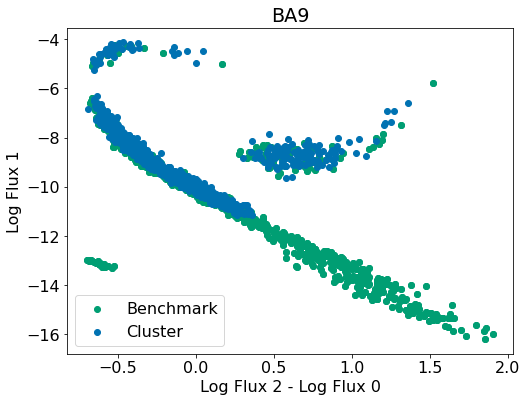

In [552]:
m0, m1, m2 = (np.log10(galaxyba9['BlueF']), 
              np.log10(galaxyba9['GreenF']), 
              np.log10(galaxyba9['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA9')
10**(8.7/2)

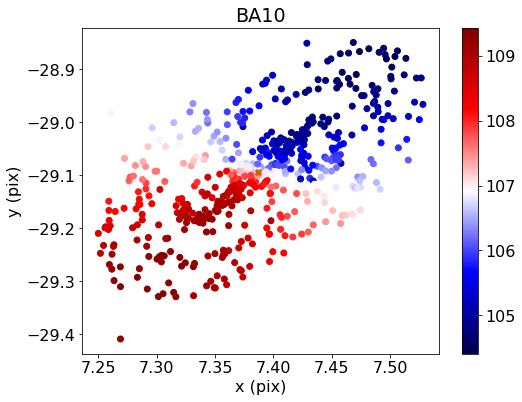

In [385]:
centre = (7.38684234, -29.09425255)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba10 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba10.X,galaxyba10.Y,c=galaxyba10.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA10');


Text(0.5, 1.0, 'BA10')

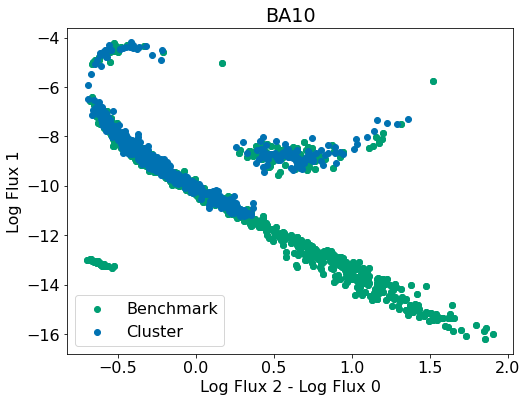

In [556]:
m0, m1, m2 = (np.log10(galaxyba10['BlueF']), 
              np.log10(galaxyba10['GreenF']), 
              np.log10(galaxyba10['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA10')

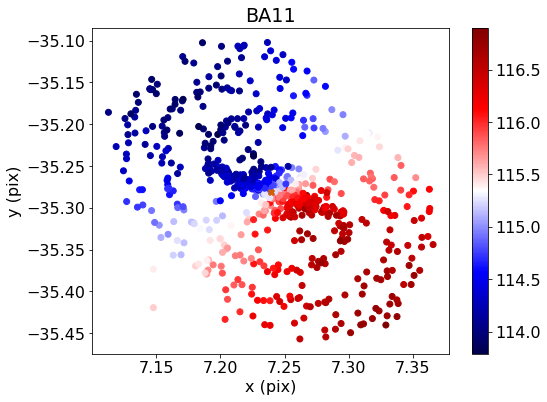

In [387]:
centre = (7.23939239, -35.28150299)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba11 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba11.X,galaxyba11.Y,c=galaxyba11.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA11');


Text(0.5, 1.0, 'BA11')

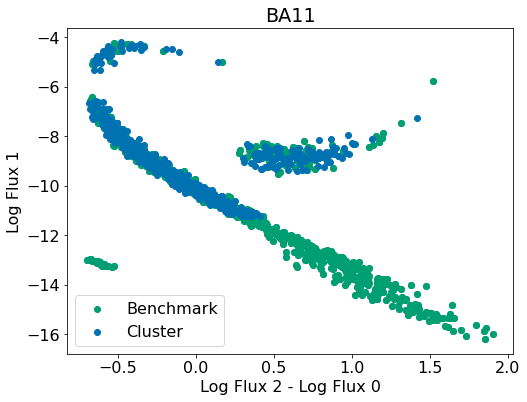

In [560]:
m0, m1, m2 = (np.log10(galaxyba11['BlueF']), 
              np.log10(galaxyba11['GreenF']), 
              np.log10(galaxyba11['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA11')

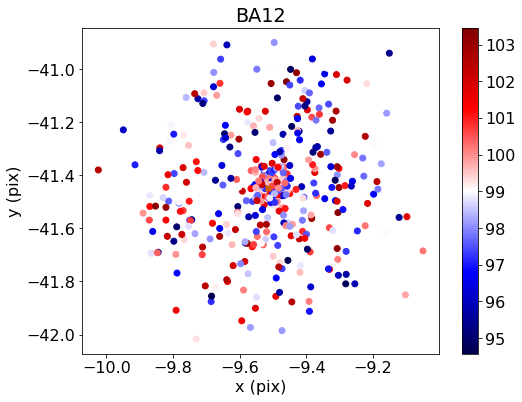

In [389]:
centre = (-9.51475882, -41.44602602)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba12 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba12.X,galaxyba12.Y,c=galaxyba12.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA12');


Text(0.5, 1.0, 'BA12')

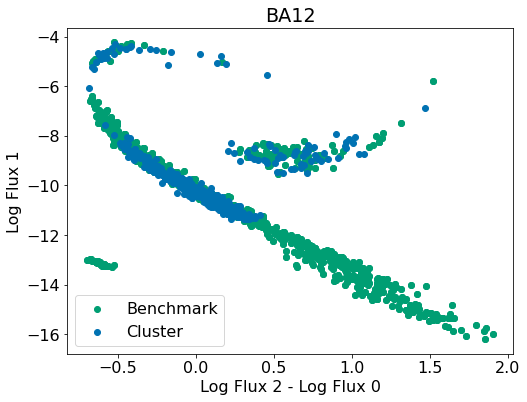

In [566]:
m0, m1, m2 = (np.log10(galaxyba12['BlueF']), 
              np.log10(galaxyba12['GreenF']), 
              np.log10(galaxyba12['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA12')

Text(0.5, 1.0, 'BA13')

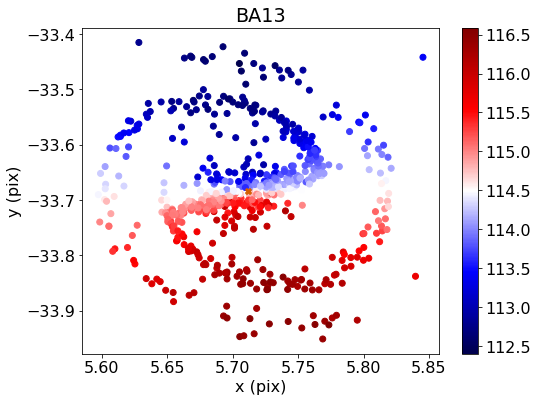

In [391]:
centre = (5.71196328, -33.68406677)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba13 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba13.X,galaxyba13.Y,c=galaxyba13.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA13')

19952.62314968879

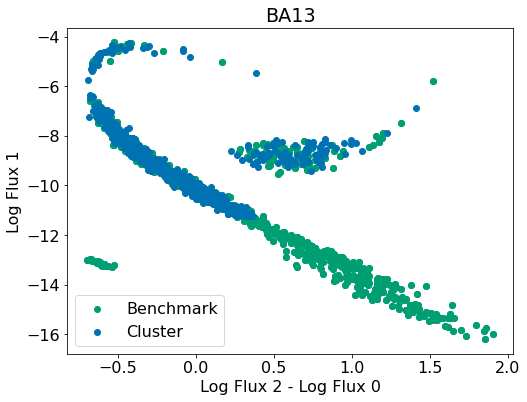

In [569]:
m0, m1, m2 = (np.log10(galaxyba13['BlueF']), 
              np.log10(galaxyba13['GreenF']), 
              np.log10(galaxyba13['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA13')
10**(8.6/2)

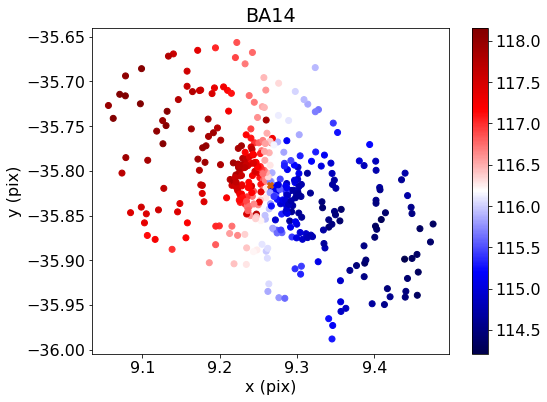

In [392]:
centre = (9.26548462, -35.81633573)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba14 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba14.X,galaxyba14.Y,c=galaxyba14.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA14');


17782.794100389227

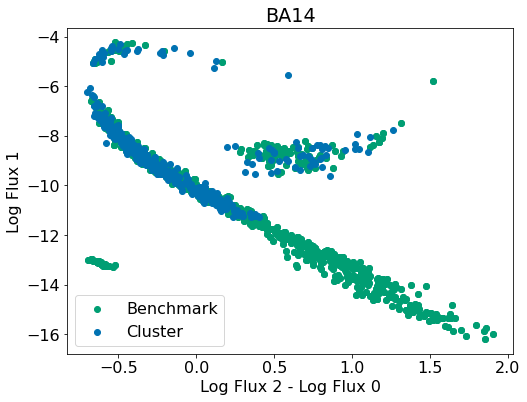

In [571]:
m0, m1, m2 = (np.log10(galaxyba14['BlueF']), 
              np.log10(galaxyba14['GreenF']), 
              np.log10(galaxyba14['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA14')
10**(8.5/2)

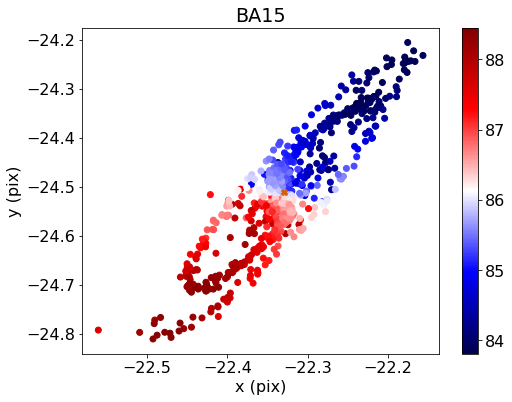

In [393]:
centre = (-22.32923073, -24.51114134)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba15 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba15.X,galaxyba15.Y,c=galaxyba15.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA15');

11220.18454301963

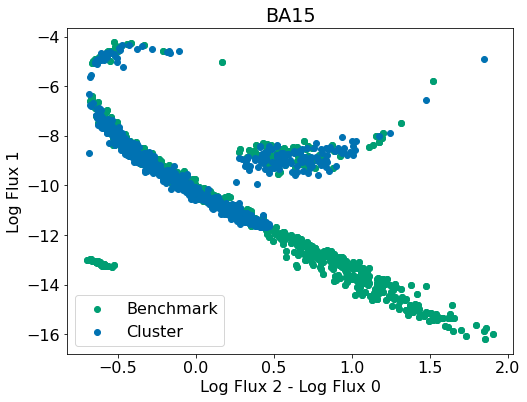

In [575]:
m0, m1, m2 = (np.log10(galaxyba15['BlueF']), 
              np.log10(galaxyba15['GreenF']), 
              np.log10(galaxyba15['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA15')
10**(8.1/2)

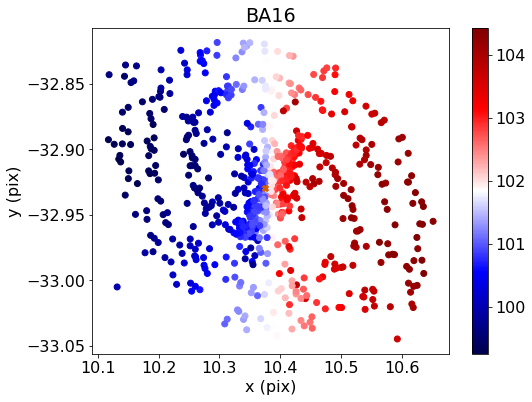

In [401]:
centre = (10.37419578, -32.92942329)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba16 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba16.X,galaxyba16.Y,c=galaxyba16.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA16');

22387.21138568338

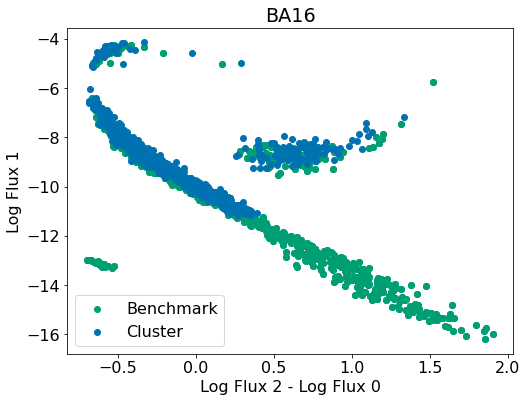

In [580]:
m0, m1, m2 = (np.log10(galaxyba16['BlueF']), 
              np.log10(galaxyba16['GreenF']), 
              np.log10(galaxyba16['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA16')
10**(8.7/2)

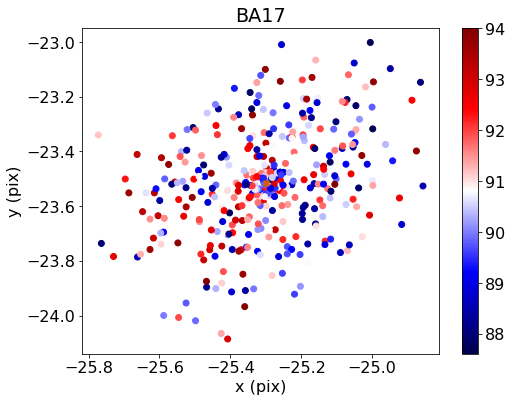

In [403]:
centre = (-25.29921244, -23.51684139)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba17 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba17.X,galaxyba17.Y,c=galaxyba17.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA17');

14125.375446227554

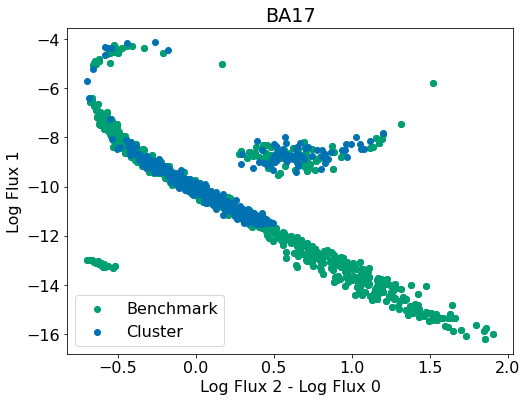

In [583]:
m0, m1, m2 = (np.log10(galaxyba17['BlueF']), 
              np.log10(galaxyba17['GreenF']), 
              np.log10(galaxyba17['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.3,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA17')
10**(8.3/2)

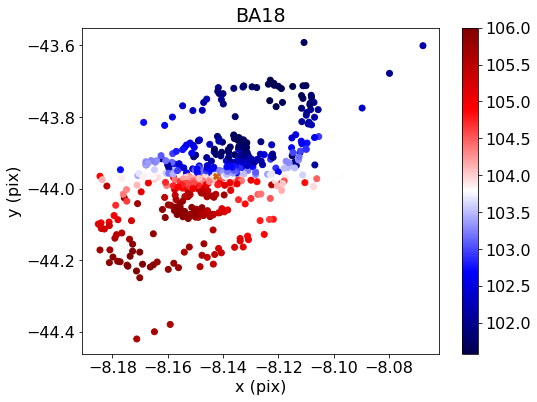

In [405]:
centre = (-8.14270442, -43.96367691)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba18 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba18.X,galaxyba18.Y,c=galaxyba18.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA18');

19952.62314968879

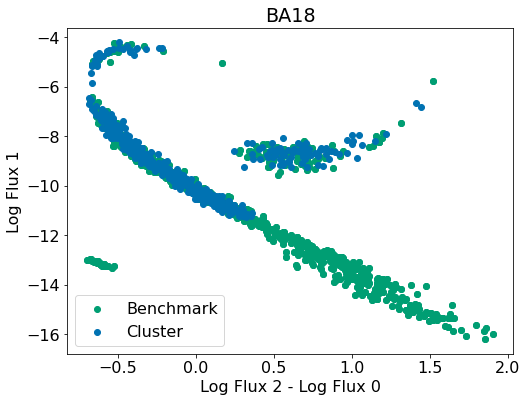

In [589]:
m0, m1, m2 = (np.log10(galaxyba18['BlueF']), 
              np.log10(galaxyba18['GreenF']), 
              np.log10(galaxyba18['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA18')
10**(8.6/2)

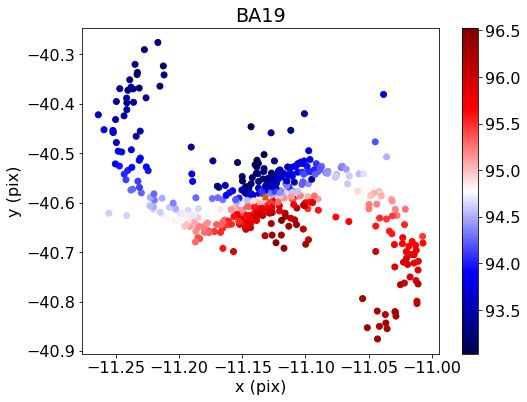

In [407]:
centre = (-11.13208013, -40.58794292)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba19 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba19.X,galaxyba19.Y,c=galaxyba19.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA19');

19952.62314968879

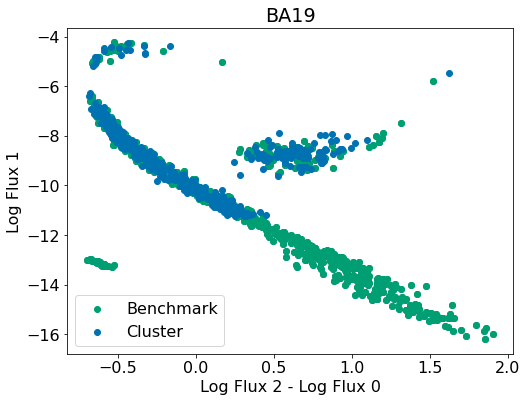

In [593]:
m0, m1, m2 = (np.log10(galaxyba19['BlueF']), 
              np.log10(galaxyba19['GreenF']), 
              np.log10(galaxyba19['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA19')
10**(8.6/2)

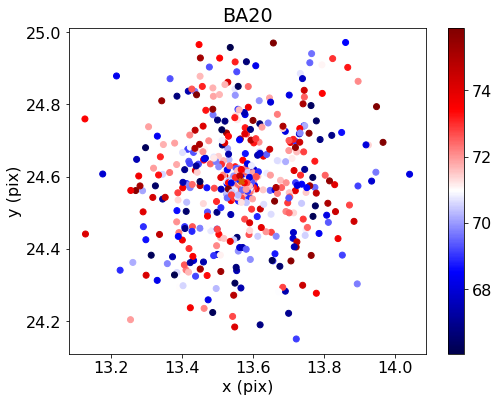

In [409]:
centre = (13.56565183,  24.58746981)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba20 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba20.X,galaxyba20.Y,c=galaxyba20.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA20');

28183.82931264455

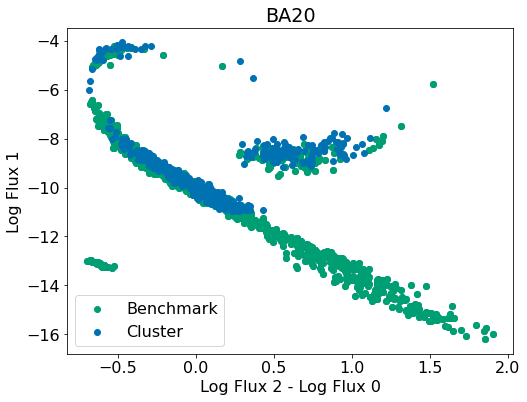

In [597]:
m0, m1, m2 = (np.log10(galaxyba20['BlueF']), 
              np.log10(galaxyba20['GreenF']), 
              np.log10(galaxyba20['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA20')
10**(8.9/2)

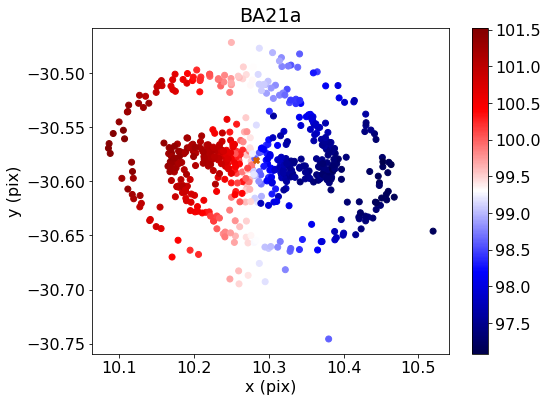

In [448]:
centre = (10.28218743, -30.58019354)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba21a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba21a.X,galaxyba21a.Y,c=galaxyba21a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA21a');

17782.794100389227

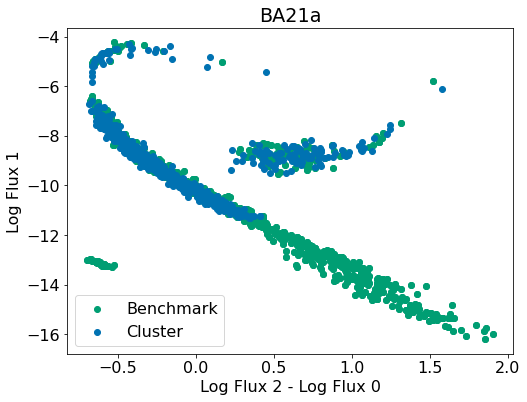

In [602]:
m0, m1, m2 = (np.log10(galaxyba21a['BlueF']), 
              np.log10(galaxyba21a['GreenF']), 
              np.log10(galaxyba21a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA21a')
10**(8.5/2)

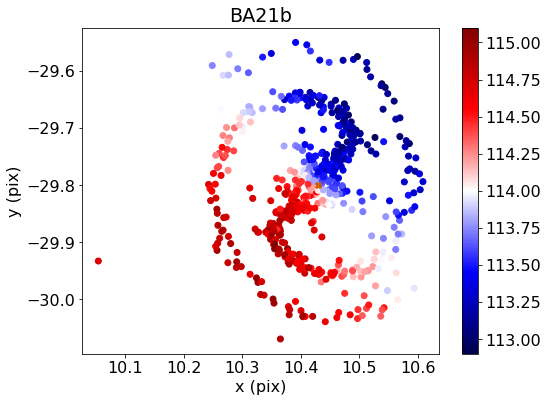

In [447]:
centre = (10.43, -29.8)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba21b = backstars[d<0.4] # filter to only close ones
plt.scatter(galaxyba21b.X,galaxyba21b.Y,c=galaxyba21b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA21b');

17782.794100389227

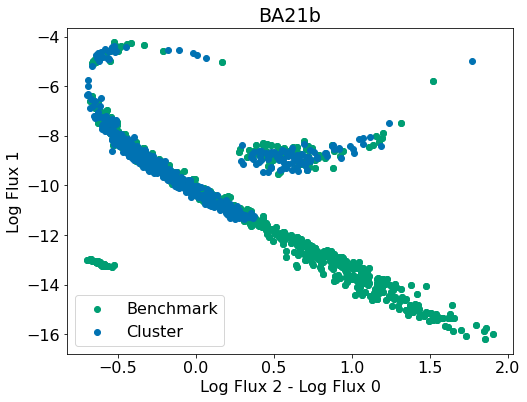

In [604]:
m0, m1, m2 = (np.log10(galaxyba21b['BlueF']), 
              np.log10(galaxyba21b['GreenF']), 
              np.log10(galaxyba21b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA21b')
10**(8.5/2)

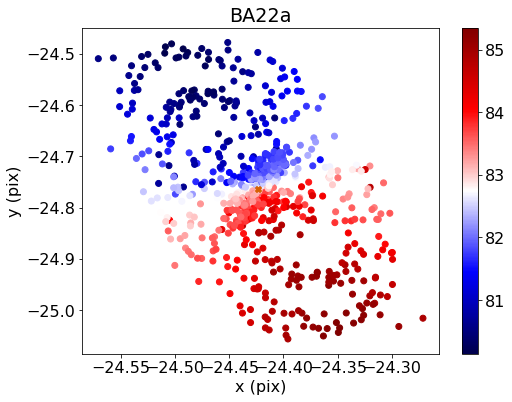

In [455]:
centre = (-24.42321423, -24.76371036)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba22a = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba22a.X,galaxyba22a.Y,c=galaxyba22a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA22a');

11220.18454301963

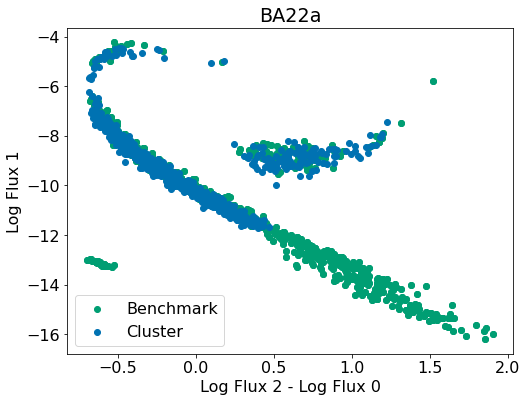

In [609]:
m0, m1, m2 = (np.log10(galaxyba22a['BlueF']), 
              np.log10(galaxyba22a['GreenF']), 
              np.log10(galaxyba22a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA22a')
10**(8.1/2)

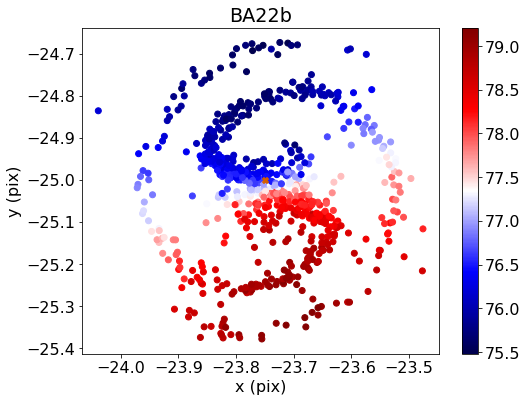

In [452]:
centre = (-23.75, -25)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba22b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba22b.X,galaxyba22b.Y,c=galaxyba22b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA22b');

14125.375446227554

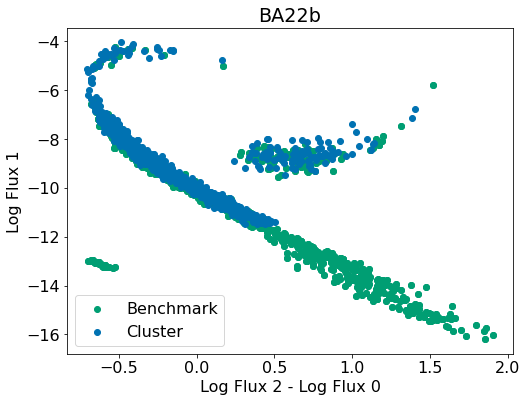

In [612]:
m0, m1, m2 = (np.log10(galaxyba22b['BlueF']), 
              np.log10(galaxyba22b['GreenF']), 
              np.log10(galaxyba22b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.3,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA22b')
10**(8.3/2)

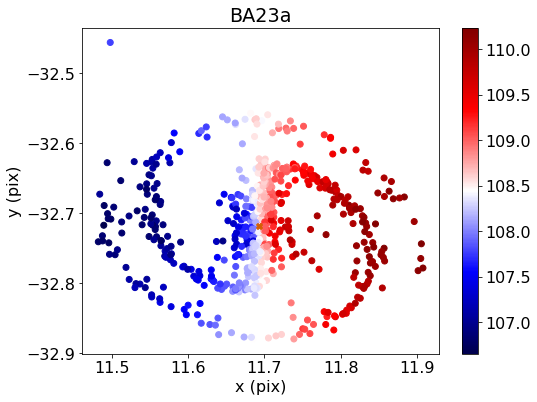

In [460]:
centre = (11.69323639, -32.71761962)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba23a = backstars[d<0.4] # filter to only close ones
plt.scatter(galaxyba23a.X,galaxyba23a.Y,c=galaxyba23a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA23a');

19952.62314968879

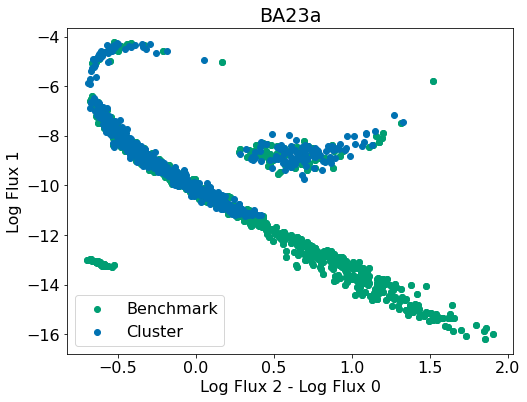

In [617]:
m0, m1, m2 = (np.log10(galaxyba23a['BlueF']), 
              np.log10(galaxyba23a['GreenF']), 
              np.log10(galaxyba23a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA23a')
10**(8.6/2)

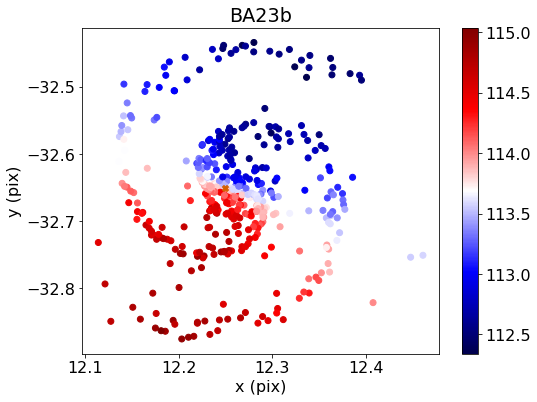

In [458]:
centre = (12.25, -32.65)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba23b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba23b.X,galaxyba23b.Y,c=galaxyba23b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA23b');

19952.62314968879

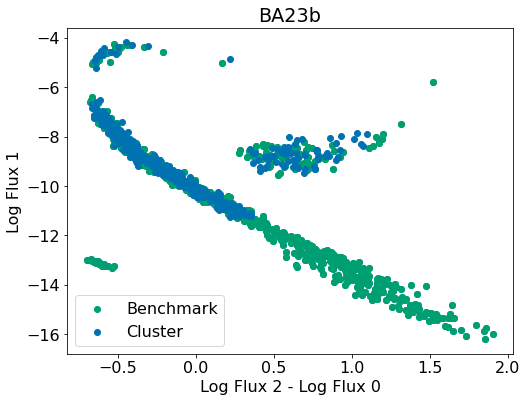

In [620]:
m0, m1, m2 = (np.log10(galaxyba23b['BlueF']), 
              np.log10(galaxyba23b['GreenF']), 
              np.log10(galaxyba23b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA23b')
10**(8.6/2)